In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt

# Import functions
import av_api 
import user_inputs
import interactive_widgets as iw

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("AV_API_KEY")

In [3]:
tickers = user_inputs.get_user_input_tickers()
start = user_inputs.get_user_dates()
end = user_inputs.get_user_dates()
stock_data = av_api.get_stock_data(tickers, start, end, api_key)
stock_data.head(10)

Ticker       BRK.B                                         NVDA          \
Stock Info    open      high     low   close     volume    open    high   
date                                                                      
2023-10-20  338.15  340.0000  334.35  335.86  3472804.0  418.90  424.70   
2023-10-19  340.31  342.6900  338.45  338.66  2745685.0  428.11  432.97   
2023-10-18  344.72  344.8300  339.96  340.89  2978004.0  425.91  432.19   
2023-10-17  346.18  348.4091  344.15  345.39  2999308.0  440.00  447.54   
2023-10-16  348.00  349.9400  345.83  346.23  3120530.0  450.63  462.25   
2023-10-13  346.00  348.4400  343.88  345.09  2805970.0  469.60  471.16   
2023-10-12  348.21  348.6600  343.02  345.66  2678343.0  467.77  476.09   
2023-10-11  349.38  349.6000  344.92  348.43  2621414.0  461.96  468.59   
2023-10-10  347.00  349.5100  345.50  348.56  2859909.0  453.10  462.59   
2023-10-09  344.24  345.9000  342.83  345.45  2763106.0  448.42  456.05   

Ticker                                  ...     XOM                            \
Stock Info     low   close      volume  ...    open     high      low   close   
date                                    ...                                     
2023-10-20  410.78  413.87  47726605.0  ...  112.92  113.320  110.790  111.08   
2023-10-19  418.82  421.01  50123308.0  ...  112.72  113.965  111.325  113.02   
2023-10-18  418.25  421.96  62729434.0  ...  111.82  113.390  111.700  112.95   
2023-10-17  424.80  439.38  81233267.0  ...  109.73  111.800  109.680  111.39   
2023-10-16  449.12  460.95  37509924.0  ...  110.50  110.680  109.130  109.95   
2023-10-13  452.80  454.61  47542599.0  ...  108.03  110.200  107.840  109.87   
2023-10-12  463.30  469.45  48132500.0  ...  107.59  107.840  106.090  106.47   
2023-10-11  460.50  468.06  37813689.0  ...  106.96  107.170  104.830  106.49   
2023-10-10  450.88  457.98  36858208.0  ...  111.02  111.450  110.120  110.45   
2023-10-09  443.68  452.73  40967472.0  ...  110.44  112.070  109.520  110.92   

Ticker                    BAC                                      
Stock Info      volume   open    high      low  close      volume  
date                                                               
2023-10-20  22445269.0  26.80  26.940  26.2400  26.31  62058406.0  
2023-10-19  20972488.0  27.25  27.780  26.8800  26.96  58610976.0  
2023-10-18  23380266.0  27.54  28.040  27.2100  27.31  68371128.0  
2023-10-17  19775440.0  27.05  27.870  26.7200  27.62  95344213.0  
2023-10-16  18451996.0  27.16  27.180  26.7722  26.99  56817509.0  
2023-10-13  30290328.0  27.43  27.720  26.5200  26.76  55118405.0  
2023-10-12  31182957.0  26.97  27.075  26.6100  26.90  44249794.0  
2023-10-11  57939024.0  27.17  27.435  26.9000  27.02  38508202.0  
2023-10-10  13891952.0  26.61  27.300  26.5700  27.01  51960103.0  
2023-10-09  22369887.0  25.76  26.360  25.7200  26.31  39953748.0  

[10 rows x 25 columns]

Close price for each bank for the entire index of time

In [ ]:
for tick in tickers:
    stock_data[tick]['close'].plot(figsize=(12,4),label=tick)
    plt.legend()

In [4]:
# Create a new empty DataFrame called returns. This dataframe will contain the returns for each stock.
returns = pd.DataFrame()

# Use pandas pct_change() method on the Close column to create a column representing this return value. 
# Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.
for tick in tickers:
    returns[tick+' Return'] = stock_data[tick]['close'].pct_change()

returns.head(10)    

,BRK.B Return,NVDA Return,PFE Return,XOM Return,BAC Return
date,,,,,
2023-10-20,NaN,NaN,NaN,NaN,NaN
2023-10-19,0.008337,0.017252,0.017618,0.017465,0.024705
2023-10-18,0.006585,0.002256,0.007054,-0.000619,0.012982
2023-10-17,0.013201,0.041284,0.042662,-0.013811,0.011351
2023-10-16,0.002432,0.049092,0.015878,-0.012928,-0.022810
2023-10-13,-0.003293,-0.013754,-0.034866,-0.000728,-0.008522
2023-10-12,0.001652,0.032643,0.025226,-0.030946,0.005232
2023-10-11,0.008014,-0.002961,0.005772,0.000188,0.004461
2023-10-10,0.000373,-0.021536,0.001812,0.037187,-0.000370


## Returns

In [5]:
my_returns = iw.create_column_plot_widget(returns)
my_returns

interactive(children=(Dropdown(description='Select Column:', options=('BRK.B Return', 'NVDA Return', 'PFE Retu…

## Moving Averages
** Plot the rolling 30 day average against the Close Price for a stock**

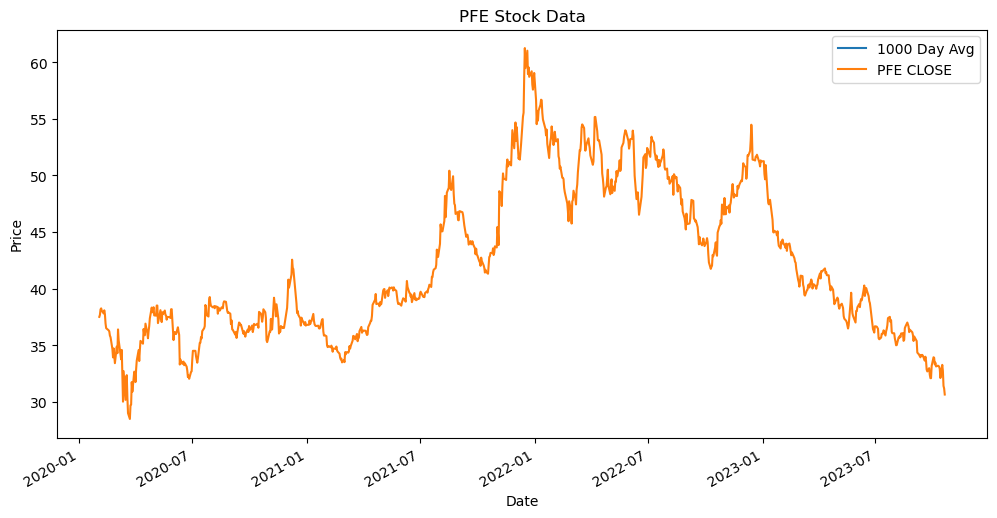

In [6]:
user_ticker = user_inputs.get_user_input_one_ticker(stock_data)
start_date = user_inputs.get_user_dates()
window_size = int(input("Enter the rolling window size: "))
moving_averages = iw.plot_stock_data_with_window(stock_data, user_ticker, start_date, window_size)
moving_averages

## Exploratory Data Analysis

In [8]:
# Example usage:
tab_widget = iw.create_tab_widget(stock_data, returns)
tab_widget